In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Clean_Dataset.csv')

df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# Data CLeaning


In [3]:
df = df.drop(columns=['Unnamed: 0'], axis = 1)

In [4]:
df = df.drop(columns=['flight'], axis = 1)

In [5]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [8]:
df.value_counts()

airline   source_city  departure_time  stops  arrival_time  destination_city  class    duration  days_left  price
SpiceJet  Mumbai       Early_Morning   zero   Morning       Kolkata           Economy  2.67      14         7412     4
Indigo    Delhi        Early_Morning   zero   Morning       Mumbai            Economy  2.17      48         2410     3
                                                                                                 47         2410     3
SpiceJet  Mumbai       Early_Morning   zero   Morning       Kolkata           Economy  2.67      7          7412     3
                                                                                                 10         7412     3
                                                                                                                    ..
Vistara   Mumbai       Night           zero   Night         Delhi             Economy  2.08      45         2339     1
                                                     

# Data Preprocessing

In [14]:
#Target Encoding

cols = ['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city', 'class']

for i in cols:
    df[i] = df.groupby([i])['price'].transform('mean')

df[cols]

,airline,source_city,departure_time,arrival_time,destination_city,class
0,6179.278881,18951.326639,21232.361894,21586.758341,21372.529469,6572.342383
1,6179.278881,18951.326639,20370.676718,22231.076098,21372.529469,6572.342383
2,4091.072742,18951.326639,20370.676718,14993.139521,21372.529469,6572.342383
3,30396.536302,18951.326639,21630.760254,18494.598993,21372.529469,6572.342383
4,30396.536302,18951.326639,21630.760254,22231.076098,21372.529469,6572.342383
...,...,...,...,...,...,...
300148,30396.536302,21995.339871,21630.760254,23044.371615,20427.661284,52540.081124
300149,30396.536302,21995.339871,18179.203331,21586.758341,20427.661284,52540.081124
300150,30396.536302,21995.339871,20370.676718,21586.758341,20427.661284,52540.081124
300151,30396.536302,21995.339871,20370.676718,23044.371615,20427.661284,52540.081124


In [15]:
#Label Encoding

df['stops'] = df['stops'].map({'zero': 0, 'one': 1, 'two_or_more': 2})

In [16]:
df['stops']

0         0
1         0
2         0
3         0
4         0
         ..
300148    1
300149    1
300150    1
300151    1
300152    1
Name: stops, Length: 300153, dtype: int64

## Correlation map

<Axes: >

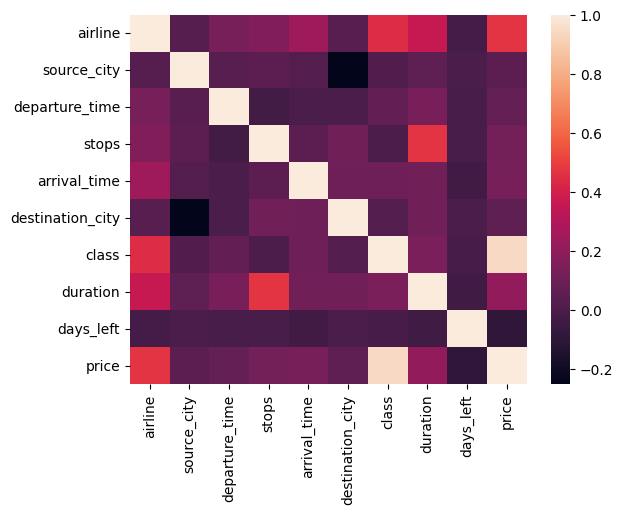

In [17]:
sns.heatmap(df.corr())

# Machine Learning

In [18]:
X = df.drop(columns = ['price'], axis=1)
y = df['price']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error

#Basemodel Estimator
model1 = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

print(r2_score(y_test, y_pred))


0.9039051308893866


In [20]:
root_mean_squared_error(y_test, y_pred)

7038.124864439549

Base model of Linear Regression gives promisin result. Will do the crossvalidation to check model bias and variance spread.

In [25]:
from sklearn.model_selection import cross_val_score

model = LinearRegression()
scores = cross_val_score(model, X, y, scoring='r2', cv=5)

print("Cross-validated R² scores:", scores)
print("Mean:", np.mean(scores))
print("Standard Deviation:", np.std(scores))

Cross-validated R² scores: [-0.6730326  -0.06801758 -0.04369855  0.83686045  0.07381344]
Mean: 0.025185032554030307
Standard Deviation: 0.4821039811053131


Base model mean is low and standard deviation is high, need to check witb other models to get better result.

In [26]:
# Comparing RandomForestRegressor and GradientBoostingRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Bagging: Random Forest
rf = RandomForestRegressor()
rf_scores = cross_val_score(rf, X, y, scoring='r2', cv=5)
print("RF CV R² mean:", np.mean(rf_scores))

# Boosting: Gradient Boosting
gb = GradientBoostingRegressor()
gb_scores = cross_val_score(gb, X, y, scoring='r2', cv=5)
print("GB CV R² mean:", np.mean(gb_scores))


RF CV R² mean: 0.49740037302184403
GB CV R² mean: 0.6041247641731788


In [27]:
# Also checking the score for XGBRegressor

from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb_scores = cross_val_score(xgb, X, y, scoring='r2', cv=5)
print("XGB CV R² mean:", np.mean(xgb_scores))

XGB CV R² mean: 0.4222315430641174


Gradient Boosting Regressor has given the best mean of r2_score so far, will do parameter tuning, using gridsearchcv to find the best parameter.


In [28]:
from sklearn.model_selection import GridSearchCV

gbr = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=gbr,
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [29]:
gbr = GradientBoostingRegressor(n_estimators = 200, max_depth = 5, subsample = 0.8, learning_rate = 0.1)

gbr.fit(X_train, y_train)

y_pred_final = gbr.predict(X_test)

In [30]:
r2_score(y_test, y_pred_final)

0.9664939936026409

In [31]:
scores = cross_val_score(gbr, X, y, scoring='r2', cv=5)

print("Cross-validated R² scores:", scores)
print("Mean:", np.mean(scores))
print("Standard Deviation:", np.std(scores))

Cross-validated R² scores: [0.48757587 0.49270461 0.58343789 0.91399022 0.33402279]
Mean: 0.5623462757063009
Standard Deviation: 0.19322034648085581


In [32]:
print("Train R²:", gbr.score(X_train, y_train))
print("Test R²:", gbr.score(X_test, y_test))

Train R²: 0.9678417041078733
Test R²: 0.9664939936026409


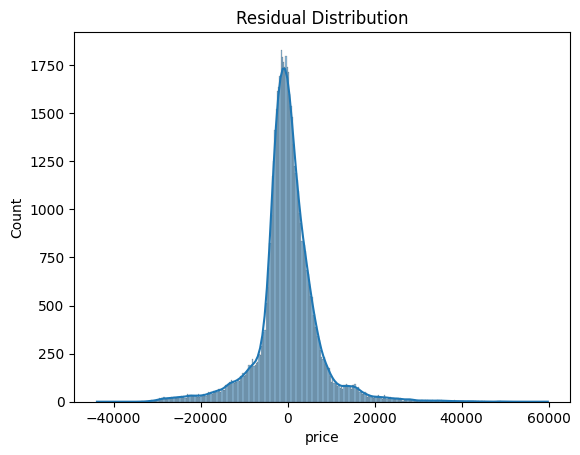

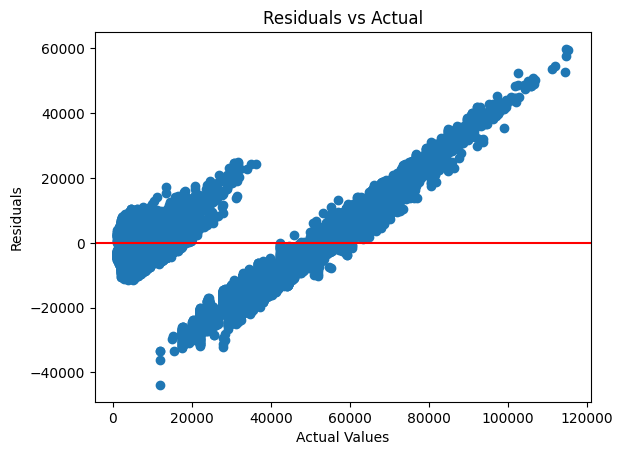

In [33]:
residuals = y_test - y_pred

# Histogram of residuals
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

# Scatter plot
plt.scatter(y_test, residuals)
plt.axhline(0, color='red')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Actual")
plt.show()


GradientBoostingRegressor has given us r2_score of 0.96. With